In [1]:
import pandas as pd
from matplotlib import pyplot as plt

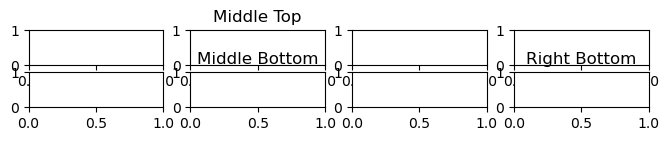

In [2]:
fig1, ax1 = plt.subplots(2, 4, figsize = (8, 1))
ax1[0,1].set_title('Middle Top')
ax1[1, 1].set_title('Middle Bottom')
ax1[1, 3].set_title('Right Bottom')


plt.show()

In [3]:
comm = pd.read_csv('commute.csv')
comm.head()

,TripID,Vehicle,Date,CommuteTime,Destination,Weather
0,0,Street Triple,11/8/2022,18.5,Franklin,rain
1,1,Street Triple,11/9/2022,19.0,Taylor,sun
2,2,Street Triple,11/10/2022,17.0,Franklin,sun
3,3,Passat,11/15/2022,22.0,Taylor,snow
4,4,Passat,11/16/2022,19.0,Taylor,snow


In [4]:
comm.describe()

,TripID,CommuteTime
count,8.00000,8.000000
mean,3.50000,19.437500
std,2.44949,1.545443
min,0.00000,17.000000
25%,1.75000,18.875000
50%,3.50000,19.000000
75%,5.25000,20.250000
max,7.00000,22.000000


In [14]:
comm.groupby(['Weather', 'Destination'])['CommuteTime'].describe()['mean']

Weather  Destination
rain     Franklin       18.5
         Taylor         21.0
snow     Taylor         20.5
sun      Franklin       18.0
         Library        20.0
         Taylor         19.0
Name: mean, dtype: float64

In [17]:
comm.groupby(['Weather', 'Destination', 'Vehicle'])['CommuteTime'].describe()[['mean', 'std']]

mean      std
Weather Destination Vehicle                     
rain    Franklin    Street Triple  18.5      NaN
        Taylor      Passat         21.0      NaN
snow    Taylor      Passat         20.5  2.12132
sun     Franklin    Passat         19.0      NaN
                    Street Triple  17.0      NaN
        Library     Street Triple  20.0      NaN
        Taylor      Street Triple  19.0      NaN

In [22]:
comm[comm['Vehicle'] == 'Street Triple']

,TripID,Vehicle,Date,CommuteTime,Destination,Weather
0,0,Street Triple,11/8/2022,18.5,Franklin,rain
1,1,Street Triple,11/9/2022,19.0,Taylor,sun
2,2,Street Triple,11/10/2022,17.0,Franklin,sun
7,7,Street Triple,12/3/2022,20.0,Library,sun


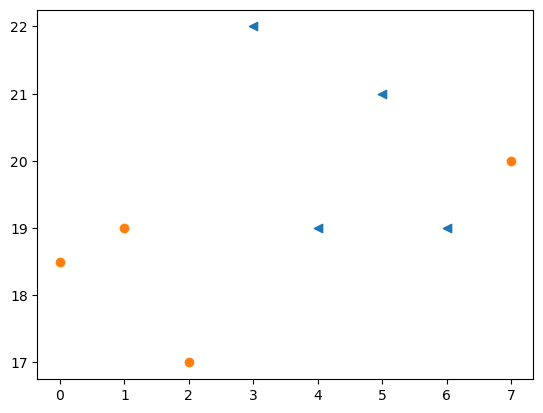

In [25]:
passat = comm[comm['Vehicle'] == 'Passat']
st = comm[comm['Vehicle'] == 'Street Triple']

fig2, ax2 = plt.subplots()
ax2.scatter(x = passat['TripID'], y = passat['CommuteTime'], marker = '<')
ax2.scatter(x = st['TripID'], y = st['CommuteTime'], marker = 'o')

plt.show()

In [28]:
grouped_df = comm.groupby(['Vehicle', 'Destination']).describe()

In [33]:
grouped_df.index

MultiIndex([(       'Passat', 'Franklin'),
            (       'Passat',   'Taylor'),
            ('Street Triple', 'Franklin'),
            ('Street Triple',  'Library'),
            ('Street Triple',   'Taylor')],
           names=['Vehicle', 'Destination'])

In [37]:
grouped_df.loc['Passat']

TripID                                    CommuteTime             \
             count mean  std  min  25%  50%  75%  max       count       mean   
Destination                                                                    
Franklin       1.0  6.0  NaN  6.0  6.0  6.0  6.0  6.0         1.0  19.000000   
Taylor         3.0  4.0  1.0  3.0  3.5  4.0  4.5  5.0         3.0  20.666667   

                                                     
                  std   min   25%   50%   75%   max  
Destination                                          
Franklin          NaN  19.0  19.0  19.0  19.0  19.0  
Taylor       1.527525  19.0  20.0  21.0  21.5  22.0

In [41]:
weather_freq = comm.groupby('Weather')['TripID'].count()
weather_freq.index

Index(['rain', 'snow', 'sun'], dtype='object', name='Weather')

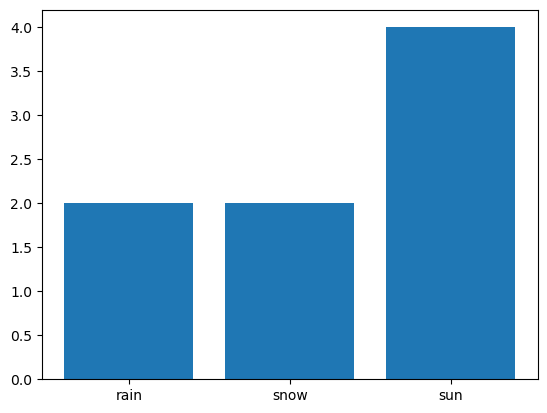

In [42]:
fig3, ax3 = plt.subplots()
ax3.bar(x = weather_freq.index, height = weather_freq)

plt.show()

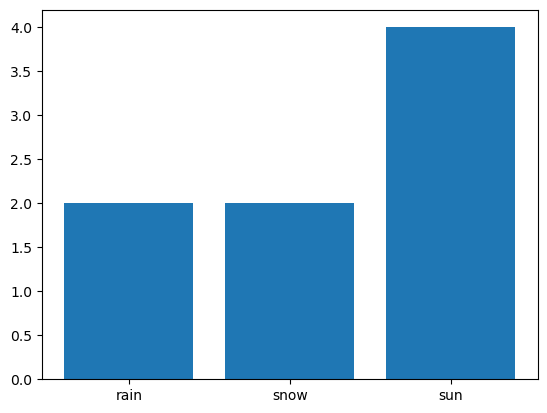

In [38]:
weather_freq = comm.groupby('Weather')['TripID'].count()
weather_freq.index

fig6, ax6 = plt.subplots()
ax6.bar(x = weather_freq.index, height = weather_freq)
# fig6.title('Title')
plt.show()